# PHÂN TÍCH THỊ TRƯỜNG VIỆC LÀM KHOA HỌC DỮ LIỆU

## 1. Web Scraping sử dụng Selenium

In [3]:
import time
from selenium import webdriver
from selenium.webdriver.common.by import By
import pandas as pd
import matplotlib.pyplot as plt

driver = webdriver.Chrome()

jobs={"roles":[],
     "companies":[],
     "locations":[],
     "experience":[],
     "skills":[]}


In [5]:
# Load 10 trang, mỗi trang mất 60 giây
for i in range(10):
    driver.get("https://www.naukri.com/data-scientist-jobs-{}".format(i))
    time.sleep(60)
    lst=driver.find_elements(By.CLASS_NAME,"srp-jobtuple-wrapper")
    
    # Duyệt qua mỗi công việc trên trang
    for job in lst:
        driver.implicitly_wait(10)
        # Lấy thông tin về vai trò, công ty, địa điểm, kinh nghiệm, kỹ năng cho mỗi công việc
        role=job.find_element(By.CSS_SELECTOR, "a.title").text
        company=job.find_element(By.CSS_SELECTOR,"a.comp-name").text
        location=job.find_element(By.CSS_SELECTOR,"span.locWdth").text
        exp=job.find_element(By.CSS_SELECTOR,"span.expwdth").text
        skills=job.find_element(By.CLASS_NAME,"tags-gt").text
        
        # Lưu thông tin vào từ điển jobs
        jobs["roles"].append(role)
        jobs["companies"].append(company)
        jobs["locations"].append(location)
        jobs["experience"].append(exp)
        jobs["skills"].append(skills)


In [ ]:
import pandas as pd  # Import thư viện pandas để làm việc với dữ liệu dạng bảng

# Tạo một DataFrame từ dữ liệu trong từ điển jobs và gán cho biến DS_jobs_df
DS_jobs_df = pd.DataFrame(jobs)


In [ ]:
# Lưu DataFrame DS_jobs_df vào một file CSV có tên là "ptttkhdl-data.csv"
DS_jobs_df.to_csv("ptttkhdl-data.csv")


## 2. Tiền xử lý

In [ ]:
# Đọc dữ liệu từ file CSV "ptttkhdl-data.csv" và sử dụng cột đầu tiên làm index
DS_jobs_df=pd.read_csv("ptttkhdl-data.csv", index_col=0)

# Hiển thị 5 dòng đầu tiên của DataFrame
DS_jobs_df.head(5)


,roles,companies,locations,experience,skills
0,"Data Scientist, Marketing",Coursera,"Kolkata, Mumbai, New Delhi, Hyderabad/Secunder...",4-6 Yrs,Data analysisdata scienceTroubleshootingAnalyt...
1,Hexaware_ Looking Immediate joiners -Data Scie...,Hexaware Technologies,"Hybrid - Navi Mumbai, Pune, Chennai",4-9 Yrs,GenAILLMData ScientistTransformersBertMachine ...
2,Data Scientist-Senior Associate - P&T Labs,PwC Service Delivery Center,"Mumbai, Hyderabad, Bengaluru",4-6 Yrs,AutomationGCPAnalyticalProcess improvementMach...
3,Data Scientist - CROCI Investment Strategy,Deutsche Bank,Mumbai,3-5 Yrs,Python programmingC#MatplotlibJavaInvestment S...
4,Adobe Analytics,PwC Service Delivery Center,Bangalore Rural,2-4 Yrs,Adobe LaunchJavascriptAepLaunchAdobeAdobe Anal...


In [ ]:
# Kiểm tra xem dữ liệu của chúng ta có chứa giá trị null không và tổng số lượng giá trị null của mỗi cột
DS_jobs_df.isnull().sum()


roles         0
companies     0
locations     0
experience    0
skills        0
dtype: int64

In [ ]:
# Loại bỏ các giá trị thiếu
DS_jobs_df = DS_jobs_df.dropna()

# Hiển thị kích thước của DataFrame sau khi loại bỏ các giá trị thiếu
DS_jobs_df.shape


(200, 5)

In [ ]:
# Kiểm tra xem dữ liệu của chúng ta có chứa bất kỳ dữ liệu trùng lặp nào không
DS_jobs_df[DS_jobs_df.duplicated(subset=["roles","companies","roles","locations","skills"])].shape


(22, 5)

In [ ]:
"""print("Trước khi loại bỏ các bản sao : ",DS_jobs_df.shape)
DS_jobs_df.drop_duplicates(keep="first",inplace=True)
print("Sau khi loại bỏ các bản sao : "DS_jobs_df.shape)"""

'print("Trước khi loại bỏ các bản sao : ",DS_jobs_df.shape)\nDS_jobs_df.drop_duplicates(keep="first",inplace=True)\nprint("Sau khi loại bỏ các bản sao : "DS_jobs_df.shape)'

In [ ]:
# Chuyển tất cả các chuỗi thành chữ thường để tránh trùng lặp
DS_jobs_df = DS_jobs_df.apply(lambda x: x.astype(str).str.lower())

# Có nhiều hơn một địa điểm và kỹ năng được gắn với mỗi công việc, vì vậy hãy chia tách các địa điểm và kỹ năng.
DS_jobs_df.skills = [skill.split("\n") for skill in DS_jobs_df.skills]
DS_jobs_df.locations = [location.split(",") for location in DS_jobs_df.locations]
DS_jobs_df[15:20]


,roles,companies,locations,experience,skills
15,lead data scientist,baker hughes,[bengaluru],9-14 yrs,[data analysisartificial intelligencesignal pr...
16,data scientist,siemens,[bengaluru],2-3 yrs,[backendgitcodingmachine learninghealthcaredat...
17,"senior, data scientist (computer vision)",walmart,[bengaluru],6-9 yrs,[computer visionanalyticalmachine learningsupp...
18,senior data scientist,walmart,[bengaluru],10-20 yrs,[supply chaindata analysisdata sciencenetworki...
19,data scientist,volvo financial services,[bengaluru],3-6 yrs,[automationc++powertrainmechatronicssimulation...


## 3. Phân tích dữ liệu

### 3.1. Công việc khoa học dữ liệu theo địa điểm


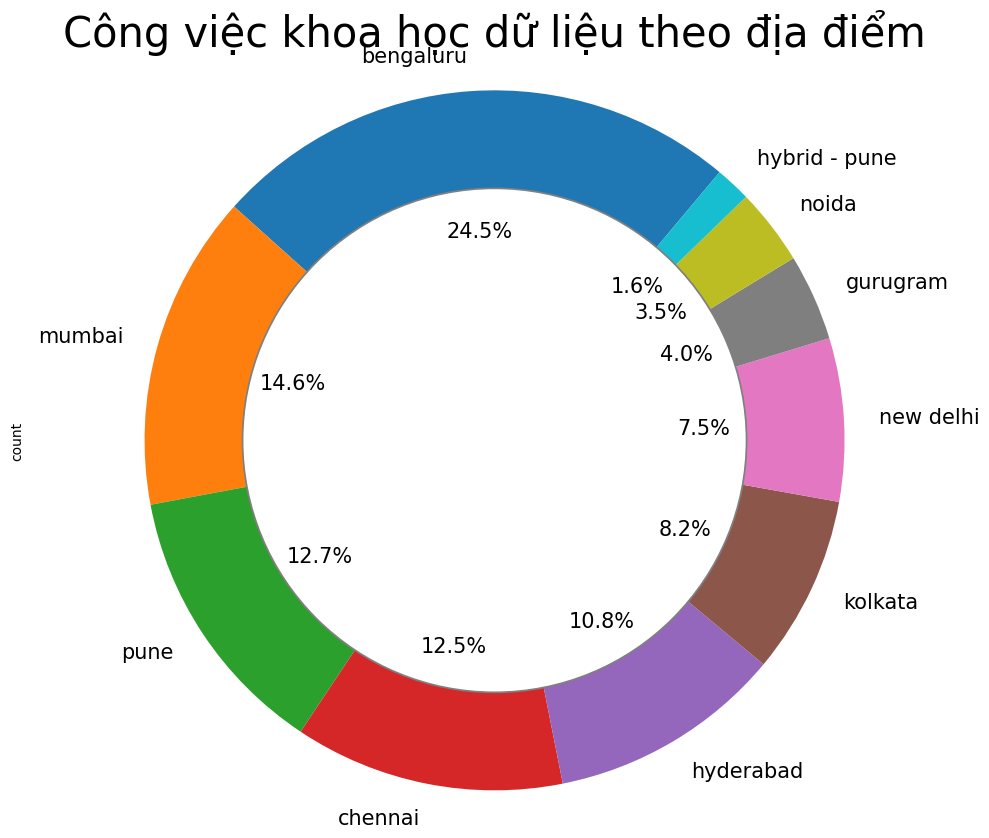

In [ ]:
# Đếm số lượng công việc Data Science theo địa điểm và vẽ biểu đồ tròn
DS_jobs_df.locations.apply(pd.Series).stack().str.strip().value_counts()[:10].plot.pie(figsize=(12,10),startangle=50,autopct='%1.1f%%',fontsize=15)

# Thiết lập tiêu đề cho biểu đồ
plt.title("Công việc khoa học dữ liệu theo địa điểm",fontsize=30)

# Tạo một hình tròn ở giữa biểu đồ
centre_circle = plt.Circle((0,0),0.72,color='gray', fc='white',linewidth=1.25)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Đảm bảo tỷ lệ trục x và y là bằng nhau
plt.axis('equal')

# Hiển thị biểu đồ
plt.show()


##### Nhận xét:

### 3.2 Các công ty có nhiều cơ hội tuyển dụng khoa học dữ liệu hơn

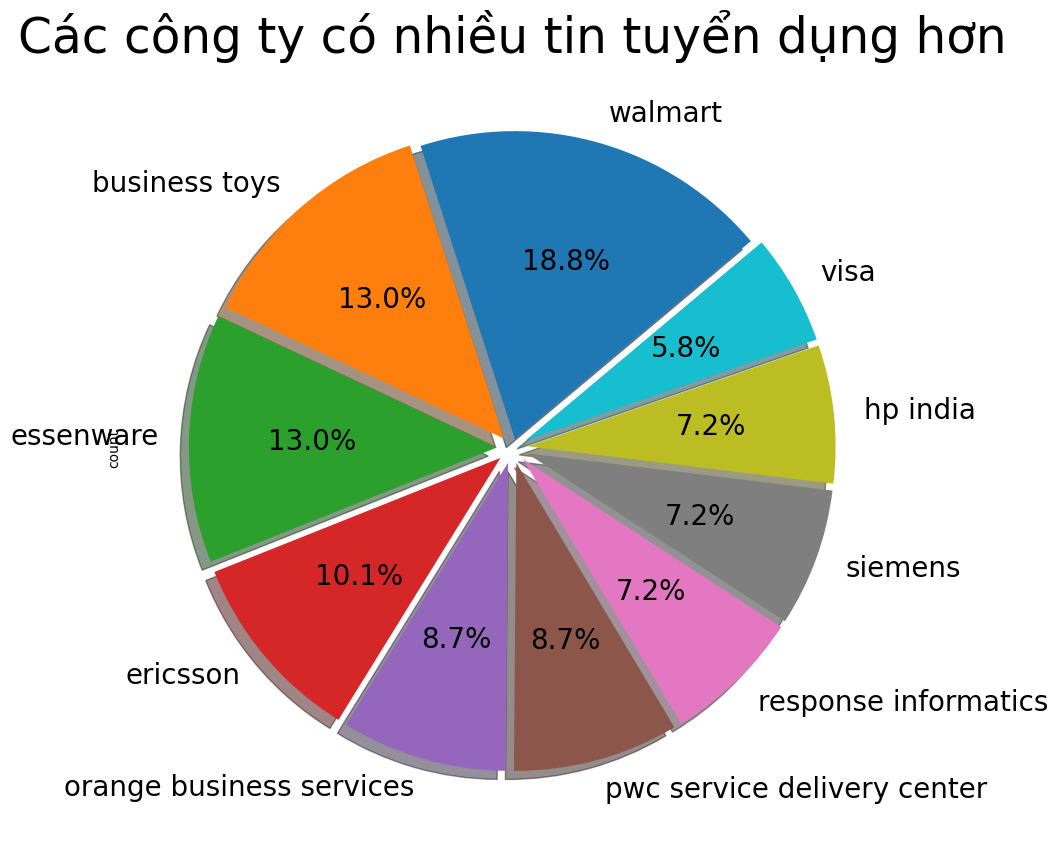

In [ ]:
# Vẽ biểu đồ tròn cho 10 công ty có số lượng công việc nhiều nhất
DS_jobs_df["companies"].value_counts()[:10].plot.pie(figsize=(12,10),explode=[0.03,0.04,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05],shadow=True, startangle=40,autopct='%1.1f%%',fontsize=20)

# Thiết lập tiêu đề cho biểu đồ
plt.title("Các công ty có nhiều tin tuyển dụng hơn",fontsize=35)

# Hiển thị biểu đồ
plt.show()


### Nhận xét

### 3.3 Nhu cầu về công việc khoa học dữ liệu

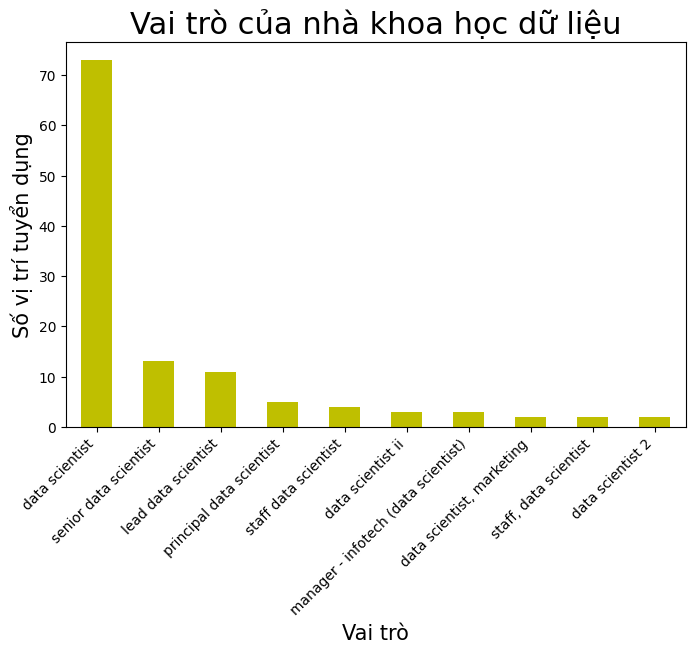

In [ ]:
# Vẽ biểu đồ cột cho 10 vai trò Data Scientist phổ biến nhất
DS_jobs_df["roles"].value_counts()[:10].plot.bar(figsize=(8,5),fontsize=10,color="y")

# Thiết lập tiêu đề và các nhãn cho biểu đồ
plt.title("Vai trò của nhà khoa học dữ liệu",fontsize=22)
plt.ylabel("Số vị trí tuyển dụng",fontsize=15,rotation=90)
plt.xlabel("Vai trò",fontsize=15)
plt.xticks(rotation=45,ha='right')

# Hiển thị biểu đồ
plt.show()


#### Nhận xét:

### 3.4. Kinh nghiệm yêu cầu cho công việc khoa học dữ liệu

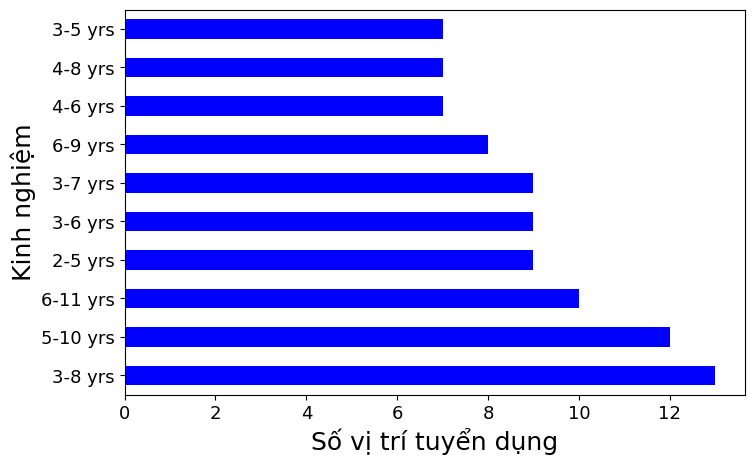

In [ ]:
# Vẽ biểu đồ thanh ngang cho số lượng công việc Data Scientist theo kinh nghiệm yêu cầu
DS_jobs_df["experience"].value_counts()[:10].plot.barh(figsize=(8,5),fontsize=13,color="b")

# Thiết lập tiêu đề và các nhãn cho biểu đồ
plt.xlabel("Số vị trí tuyển dụng",fontsize=18)
plt.ylabel("Kinh nghiệm",fontsize=18)

# Hiển thị biểu đồ
plt.show()


#### Nhận xét:

### 3.5. Những kỹ năng cần thiết cho công việc Khoa học dữ liệu

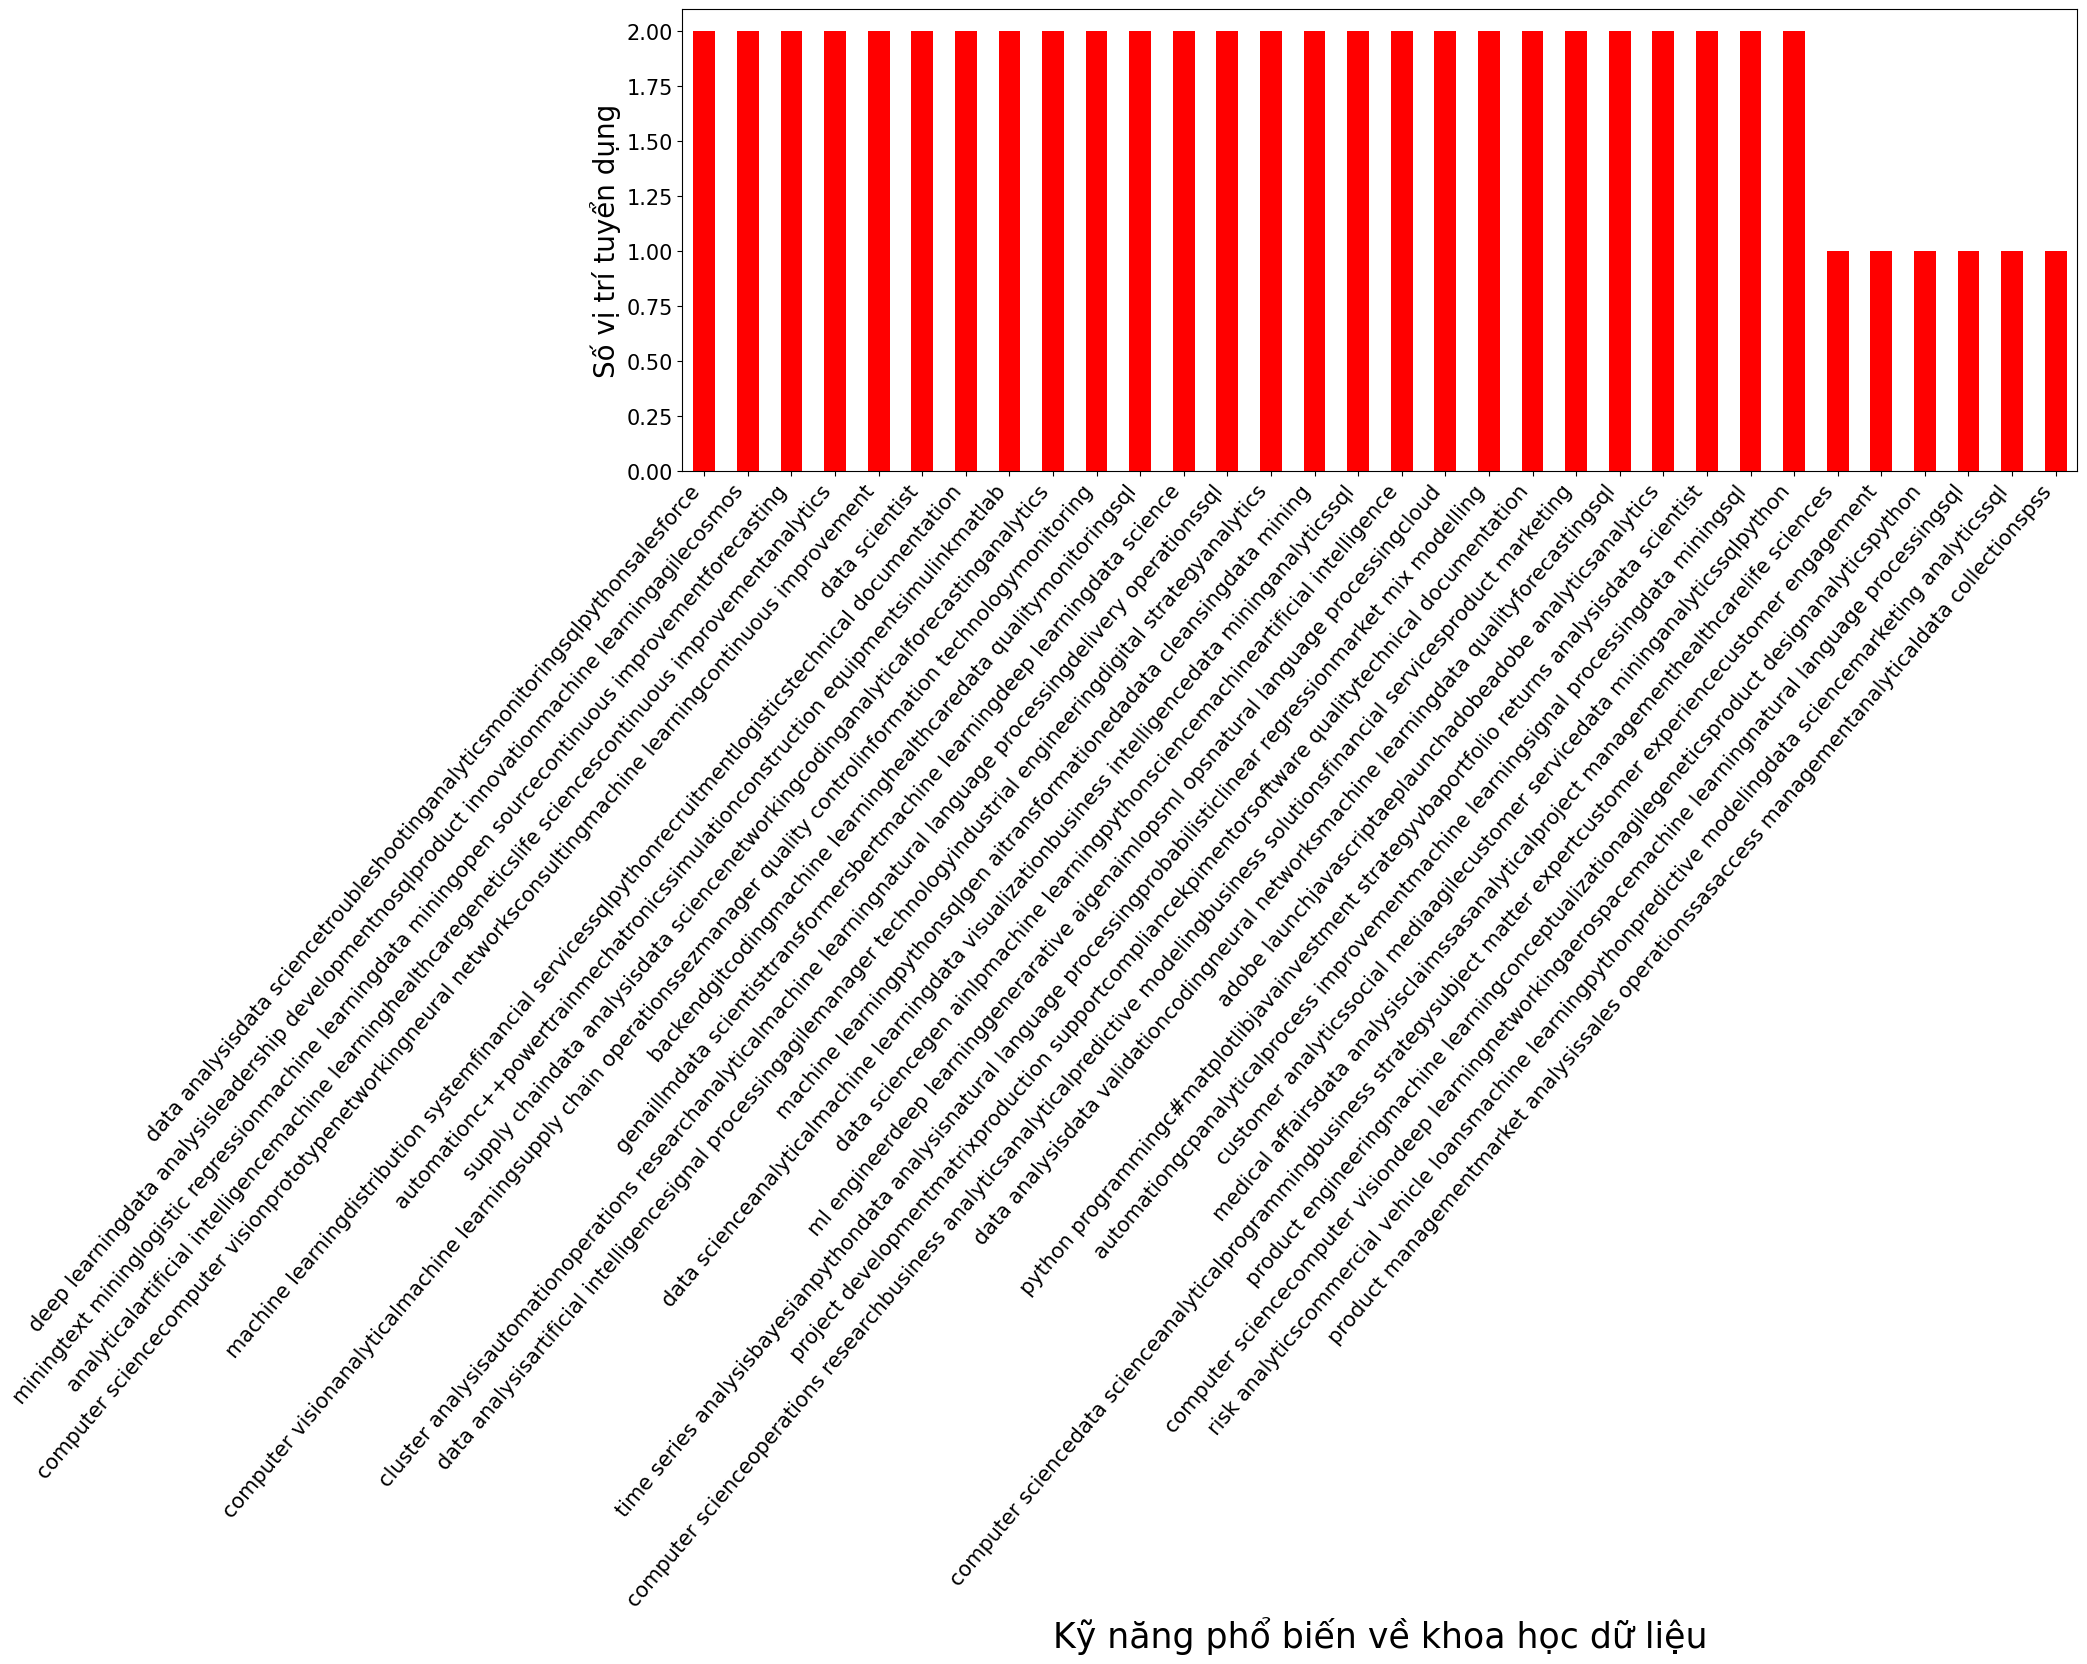

In [ ]:
# Vẽ biểu đồ cột cho các kỹ năng phổ biến trong Data Science
DS_jobs_df.skills.apply(pd.Series).stack().value_counts()[:32].plot(kind="bar",figsize=(18,6),fontsize=15,color="r")

# Thiết lập các nhãn và tiêu đề cho biểu đồ
plt.xticks(rotation=50,ha='right')
plt.ylabel("Số vị trí tuyển dụng",fontsize=20)
plt.xlabel("Kỹ năng phổ biến về khoa học dữ liệu",fontsize=25)

# Hiển thị biểu đồ
plt.show()


#### NHận xét:

In [ ]:
# Chuyển cột kỹ năng thành một DataFrame riêng, làm cho việc tiền xử lý dữ liệu dễ dàng hơn
jj = pd.DataFrame(DS_jobs_df.skills.apply(pd.Series).stack().value_counts()).reset_index()
jj.columns = ["skills", "count"]
jj.head()

,skills,count
0,data analysisdata sciencetroubleshootinganalyt...,2
1,deep learningdata analysisleadership developme...,2
2,miningtext mininglogistic regressionmachine le...,2
3,analyticalartificial intelligencemachine learn...,2
4,computer sciencecomputer visionprototypenetwor...,2


### 3.5.1. Đồi hỏi kỹ năng

In [ ]:
# Tìm các kỹ năng hàng đầu cho Data Science nói chung
datascience = {}
datascience['statistics'] = jj["count"][jj['skills'].str.contains('stat', regex=True)].sum()
datascience['machine_learning'] = jj["count"][jj['skills'].str.contains('machine |^ml', regex=True)].sum()
datascience['data_analysis'] = jj["count"][jj['skills'].str.contains('data ana', regex=True)].sum()
datascience['data_mining'] = jj["count"][jj['skills'].str.contains('mining', regex=True)].sum()
datascience['nlp'] = jj["count"][jj['skills'].str.contains('nlp|natural', regex=True)].sum()
datascience['computer_vision'] = jj["count"][jj['skills'].str.contains('computer vision', regex=True)].sum()
datascience['deep_learning'] = jj["count"][jj['skills'].str.contains('deep learning', regex=True)].sum()
datascience['big_data'] = jj["count"][jj['skills'].str.contains('big', regex=True)].sum()

# Sắp xếp dictionary theo số lượng kỹ năng giảm dần
from operator import itemgetter
datascience = dict(sorted(datascience.items(), key=itemgetter(1), reverse=True))
datascience


{'machine_learning': 124,
 'data_analysis': 40,
 'nlp': 34,
 'deep_learning': 29,
 'data_mining': 26,
 'computer_vision': 16,
 'statistics': 8,
 'big_data': 6}

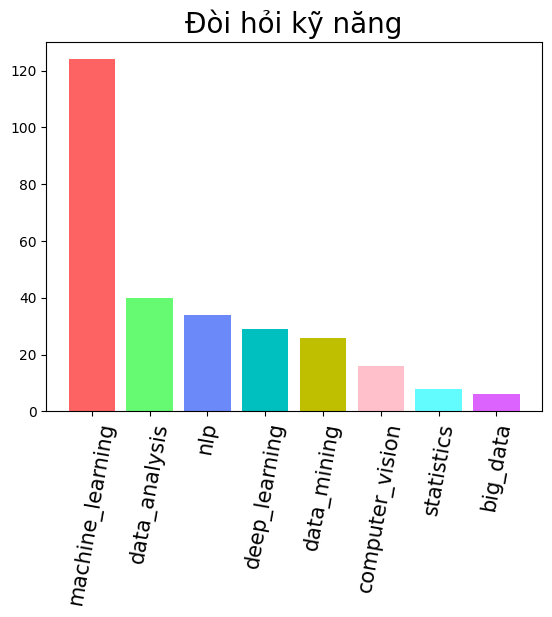

In [ ]:
plt.bar(datascience.keys(),datascience.values(),color=["#FE6363","#66FA72","#6B89F9","c","y","pink","#63FCFE","#DD63FE"])
plt.xticks(rotation=80,fontsize=15)
plt.title("Đòi hỏi kỹ năng",fontsize=20)
plt.show()

### 3.5.2. Ngôn ngữ theo yêu cầu

In [ ]:
# Tạo một từ điển chứa số lượng vị trí công việc yêu cầu các ngôn ngữ lập trình khác nhau
languages = {}
languages["python"] = jj["count"][jj['skills'].str.contains('python', regex=True)].sum()
languages["r"] = jj["count"][jj['skills'].str.contains('^r$', regex=True)].sum()
languages["matlab"] = jj["count"][jj['skills'].str.contains('matlab', regex=True)].sum()
languages["java"] = jj["count"][jj['skills'].str.contains('java$', regex=True)].sum()
languages["c++"] = jj["count"][jj['skills'].str.contains('c\+', regex=True)].sum()
languages["sas"] = jj["count"][jj['skills'].str.contains('sas', regex=True)].sum()

# Để xác định SQL trước và sau đó tách SQL không từ danh sách
sql = jj[jj['skills'].str.contains('sql', regex=True)]
languages["sql"] = sql["count"][~sql['skills'].str.contains('no', regex=True)].sum()

# Sắp xếp từ điển theo số lượng vị trí công việc yêu cầu từ cao đến thấp
languages = dict(sorted(languages.items(), key=itemgetter(1), reverse=True))
languages


<>:7: SyntaxWarning: invalid escape sequence '\+'
<>:7: SyntaxWarning: invalid escape sequence '\+'
C:\Users\hatrg\AppData\Local\Temp\ipykernel_14568\55827602.py:7: SyntaxWarning: invalid escape sequence '\+'
  languages["c++"] = jj["count"][jj['skills'].str.contains('c\+', regex=True)].sum()


{'python': 50, 'sql': 42, 'c++': 7, 'matlab': 6, 'sas': 6, 'r': 0, 'java': 0}

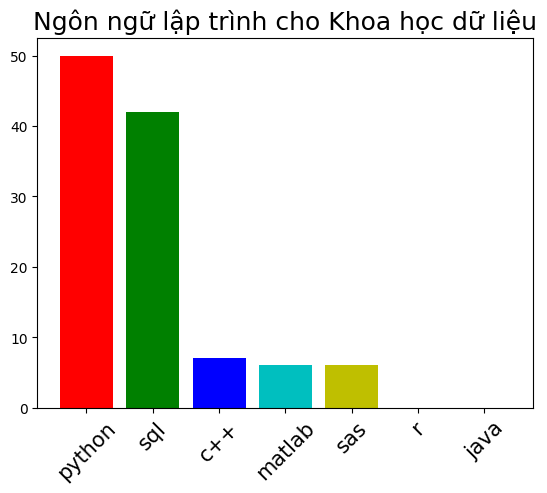

In [ ]:
# Vẽ biểu đồ cột cho các ngôn ngữ lập trình phổ biến trong lĩnh vực Data Science
plt.bar(languages.keys(), languages.values(), color=["r","g","b","c","y","pink","m"])

# Thiết lập tiêu đề và các nhãn cho biểu đồ
plt.xticks(rotation=45, fontsize=15)
plt.title("Ngôn ngữ lập trình cho Khoa học dữ liệu", fontsize=18)

# Hiển thị biểu đồ
plt.show()


### 3.5.3. Các framework

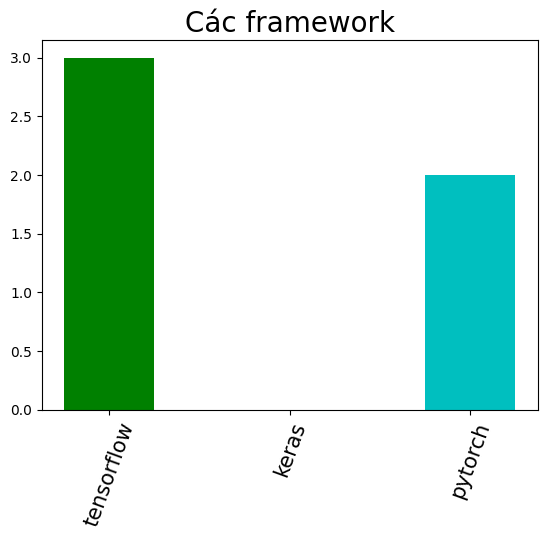

In [ ]:
# Tạo một từ điển chứa số lượng vị trí công việc yêu cầu các framework học sâu khác nhau
frameworks = {}
frameworks['tensorflow'] = jj["count"][jj['skills'].str.contains('tensor', regex=True)].sum()
frameworks['keras'] = jj["count"][jj['skills'].str.contains('keras', regex=True)].sum()
frameworks['pytorch'] = jj["count"][jj['skills'].str.contains('torch', regex=True)].sum()

# Vẽ biểu đồ cột cho các framework học sâu phổ biến
plt.bar(frameworks.keys(), frameworks.values(), color=["g","b","c"], width=.5)

# Thiết lập tiêu đề và các nhãn cho biểu đồ
plt.xticks(rotation=70, fontsize=15)
plt.title("Các framework", fontsize=20)

# Hiển thị biểu đồ
plt.show()


### 3.5.5. Clouds thường dùng

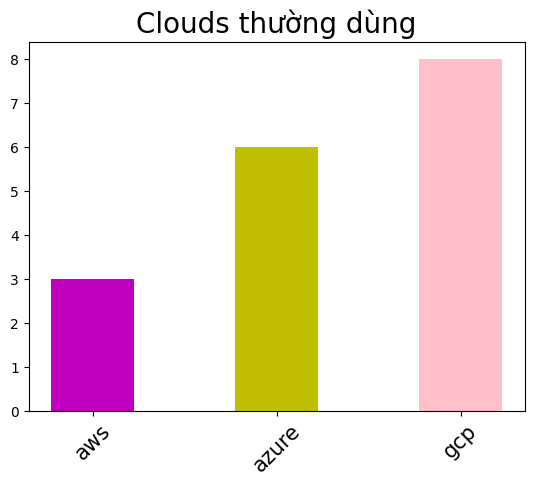

In [ ]:
# Tạo một từ điển chứa số lượng vị trí công việc yêu cầu kỹ năng liên quan đến các nhà cung cấp đám mây
cloud = {}
cloud['aws'] = jj["count"][jj['skills'].str.contains('aws', regex=True)].sum()
cloud['azure'] = jj["count"][jj['skills'].str.contains('azure', regex=True)].sum()
cloud['gcp'] = jj["count"][jj['skills'].str.contains('gcp')].sum()

# Vẽ biểu đồ cột cho các nhà cung cấp đám mây phổ biến trong lĩnh vực Data Science
plt.bar(cloud.keys(), cloud.values(), color=["m","y","pink"], width=.45)

# Thiết lập tiêu đề và các nhãn cho biểu đồ
plt.xticks(rotation=45, fontsize=15)
plt.title("Clouds thường dùng", fontsize=20)

# Hiển thị biểu đồ
plt.show()


### 3.5.6. Big Data cho khoa học dữ liệu

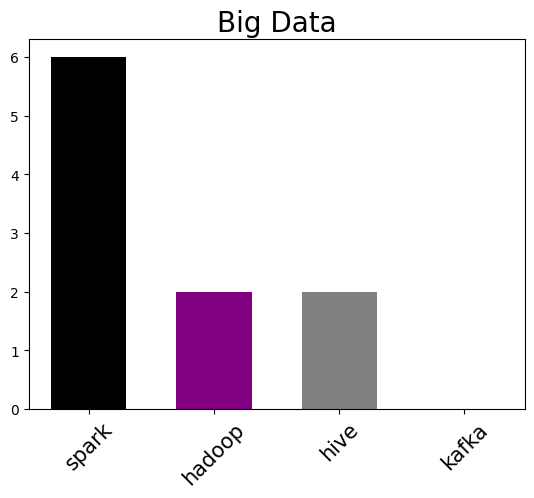

In [ ]:
# Tạo một từ điển chứa số lượng vị trí công việc yêu cầu kỹ năng liên quan đến công nghệ Big Data
bigdata = {}
bigdata["spark"] = jj["count"][jj['skills'].str.contains('spark', regex=True)].sum()
bigdata["hadoop"] = jj["count"][jj['skills'].str.contains('hadoop', regex=True)].sum()
bigdata["hive"] = jj["count"][jj['skills'].str.contains('hive', regex=True)].sum()
bigdata["kafka"] = jj["count"][jj['skills'].str.contains('kafka', regex=True)].sum()

# Vẽ biểu đồ cột cho các công nghệ Big Data phổ biến trong lĩnh vực Data Science
plt.bar(bigdata.keys(), bigdata.values(), color=["black","purple","grey","blue"], width=0.6)

# Thiết lập tiêu đề và các nhãn cho biểu đồ
plt.xticks(rotation=45, fontsize=15)
plt.title("Big Data", fontsize=20)

# Hiển thị biểu đồ
plt.show()


### 3.5.7. Công cụ trực quan hóa dữ liệu

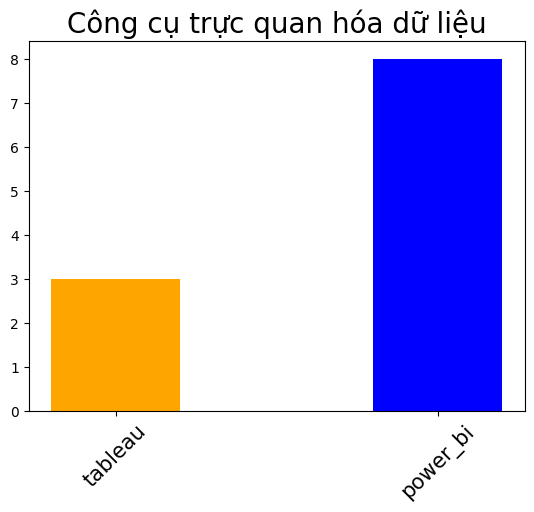

In [ ]:
# Tạo một từ điển chứa số lượng vị trí công việc yêu cầu kỹ năng liên quan đến các công cụ trực quan hóa dữ liệu
tools = {}
tools["tableau"] = jj["count"][jj['skills'].str.contains('tableau', regex=True)].sum()
tools["power_bi"] = jj["count"][jj['skills'].str.contains('power bi', regex=True)].sum()

# Vẽ biểu đồ cột cho các công cụ trực quan hóa dữ liệu phổ biến
plt.bar(tools.keys(), tools.values(), color=["orange","blue"], width=(0.4))

# Thiết lập tiêu đề và các nhãn cho biểu đồ
plt.xticks(rotation=45, fontsize=15)
plt.title("Công cụ trực quan hóa dữ liệu", fontsize=20)

# Hiển thị biểu đồ
plt.show()
